<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
fn_src = 'https://www.dropbox.com/sh/n4924ipcfjqc0t6/AADOv9JYMUBK1tlg9P71gSSra/example_data_s1.pickle?dl=1'
fn_dst = 'example_data_s1.pickle'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)

File example_data_s1.pickle is already downloaded


In [ ]:
with open('example_data_s1.pickle', 'rb') as fp:
    X,y = pickle.load(fp)

In [ ]:
tsamp = 0.05  # sampling time in seconds

# TODO 1
nt = X.shape[0]
nneuron = X.shape[1]
nout = y.shape[1]
ttotal = y.shape[0]*tsamp
print("nt =",nt)
print("nneuron =", nneuron)
print("nout =", nout)
print("ttotal =", ttotal)

nt = 61339
nneuron = 52
nout = 2
ttotal = 3066.9500000000003


In [ ]:
from sklearn.model_selection import train_test_split

# TODO 2
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=1/3)

In [ ]:
# TODO 3
regre=LinearRegression()
regre.fit(Xtr,ytr)
yhat = regre.predict(Xts)
rsq = r2_score(yts,yhat)
print("rsq =",rsq)

rsq = 0.46800926637818235


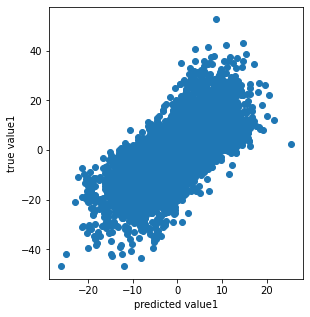

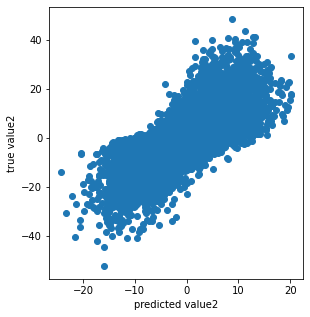

In [ ]:
# TODO 4
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(yhat[:,0],yts[:,0])
plt.xlabel('predicted value1')
plt.ylabel('true value1')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.scatter(yhat[:,1],yts[:,1])
plt.xlabel('predicted value2')
plt.ylabel('true value2')
plt.show()

In [ ]:
def create_dly_data(X,y,dly):
    """
    Create delayed data
    """    
    # TODO 5
    n=X.shape[0]
    p=X.shape[1]
    s=y.shape[1]
    Xdly = np.empty([n-dly,(dly+1)*p])
    ydly = np.empty([n-dly,s])
    for i in range(len(X)-dly):
      temp=np.array([])
      for j in range(dly+1):
        temp=np.concatenate((temp,X[i+j,:]))
      Xdly[i,:]=temp
      ydly[i,:]=y[i+dly,:]
    return Xdly, ydly

In [ ]:
# TODO 6
Xdly,ydly=create_dly_data(X,y,dly=6)
Xtrdly, Xtsdly, ytrdly, ytsdly = train_test_split(Xdly, ydly, test_size=1/3)
regre.fit(Xtrdly,ytrdly)
yhatdly=regre.predict(Xtsdly)
rsqdly=r2_score(ytsdly,yhatdly)
print("new rsq=",rsqdly)

new rsq= 0.6932712947699684


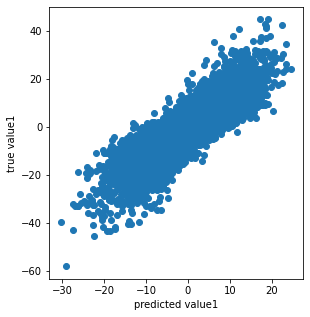

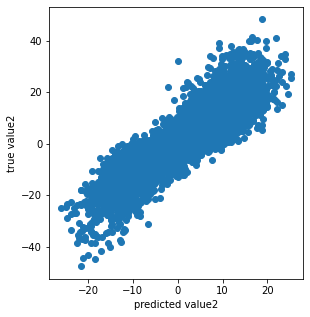

In [ ]:
# TODO 7
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(yhatdly[:,0],ytsdly[:,0])
plt.xlabel('predicted value1')
plt.ylabel('true value1')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.scatter(yhatdly[:,1],ytsdly[:,1])
plt.xlabel('predicted value2')
plt.ylabel('true value2')
plt.show()

In [ ]:
nred = 6000

# TODO 8
Xred = X[:nred,:]
yred = y[:nred,:]

In [ ]:
import  sklearn.model_selection 
import tqdm.notebook

nfold = 5  # Number of folds
dmax = 15  # maximum number of delays

# TODO 9:  Create a k-fold object
kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle=True, random_state=23)

# TODO 10:  Model orders to be tested
dtest = np.arange(0,dmax)  
nd = len(dtest)

# TODO 11.  
# Initialize a matrix Rsq to hold values of the R^2 across the model orders and folds.
# Alternatively, you can also create an RSS matrix
Rsq=np.zeros((nd,nfold))

# Create a progress bar.  Note there are nd*nfold total fits.
pbar = tqdm.notebook.tqdm(
    total=nfold*nd, initial=0,
    unit='fits', unit_divisor=nd, desc='Model order test')


for it, d in enumerate(dtest):
    # TODO 12:  
    # Create the delayed data using the create_dly_function from the reduced
    # data Xred, yred
    Xdly, ydly = create_dly_data(Xred,yred,dmax)    
        
    # Loop over the folds
    for isplit, Ind in enumerate(kf.split(Xdly)):

        # Get the training data in the split
        Itr, Its = Ind        

        # TODO 13
        # Split the data (Xdly,ydly) into training and test
        Xdly = Xdly[:,-(d+1)*X.shape[1]:]
        Xtr = Xdly[Itr]
        ytr = ydly[Itr]
        Xts = Xdly[Its]
        yts = ydly[Its]
        
        # TODO 14:  Fit data on training data        
        regre.fit(Xtr,ytr)
        # TODO 15:  Measure the R^2 vale on test data and store in the matrix Rsq
        yhatdly=regre.predict(Xts)
        rsqdly=r2_score(yts,yhatdly)
        Rsq[it,isplit]=rsqdly
        pbar.update(1)
pbar.close()


Model order test:   0%|          | 0/75 [00:00<?, ?fits/s]

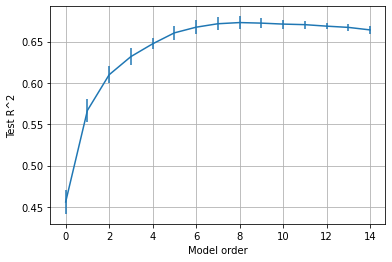

In [ ]:
# TODO 16
rsq_mean=np.mean(Rsq,axis=1)
rsq_std=np.std(Rsq,axis=1)*np.sqrt(nfold)/np.sqrt(nfold-1)
plt.errorbar(dtest, rsq_mean, yerr=rsq_std, fmt='-')
plt.xlabel('Model order')
plt.ylabel('Test R^2')
plt.grid()

In [ ]:
# TODO 17
imax=np.argmax(rsq_mean)
print("the optimal order d is ",format(dtest[imax]))

the optimal order d is  8


The estimated model order is 6


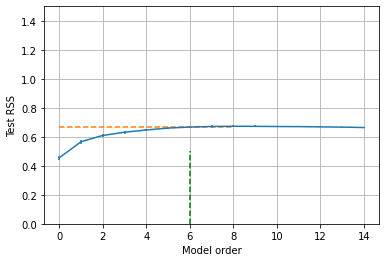

In [ ]:
# TODO 18
rsq_tgt = rsq_mean[imax] - rsq_std[imax]
# Find the lowest model order below the target
I = np.where(rsq_mean >= rsq_tgt)[0]
iopt = I[0]
dopt = dtest[iopt]

plt.errorbar(dtest, rsq_mean, yerr=rsq_std, fmt='-')

# Plot the line at the RSS target
plt.plot([dtest[0],dtest[imax]], [rsq_tgt, rsq_tgt], '--')

# Plot the line at the optimal model order
plt.plot([dopt,dopt], [0,0.5], 'g--')

plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

# Print results
print("The estimated model order is %d" % dopt)

[2.19478738e-02 5.48696845e-03 5.48696845e-03 2.19478738e-02
 3.51165981e-01 1.58573388e+00 4.61454047e+00 1.06227709e+01
 2.10919067e+01 3.77997257e+01]


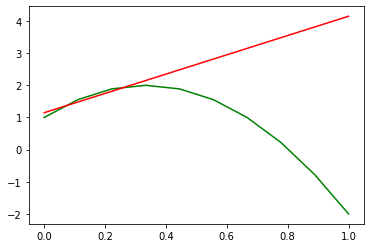

In [ ]:
x=np.linspace(0,1,10)
y=1+2*x-x**2
xm=np.mean(x)
ym=np.mean(y)
syx=np.mean((y-ym)*(x-xm))
sxx=np.mean((x-xm)**2)
beta1=syx/sxx
beta0=ym-beta1*xm
x1=np.linspace(0,3,10)
yhat=beta0+beta1*x1
y=1+2*x1-x1**2
plt.plot(x,y,color='green',linestyle='solid')
plt.plot(x,yhat,color='red',linestyle='solid')
bias=
print(bias)